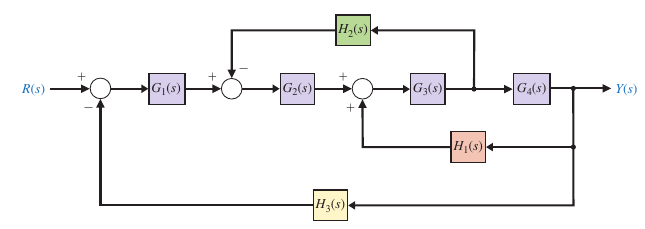

### Step: 1 Input sys transfer fucntions

In [1]:
import control as ct

g1 = ct.tf([1], [1, 10])
g2 = ct.tf([1], [1, 1])
g3 = ct.tf([1, 0, 1], [1, 4, 4])
g4 = ct.tf([1, 1], [1, 6])

h1 = ct.tf([1, 1], [1, 2])
h2 = [2]
h3 = [1]

### Step: 2 Move H2(s) behind G4(s)

In [2]:
sys1 = h2 / g4 # move h2 behing g4

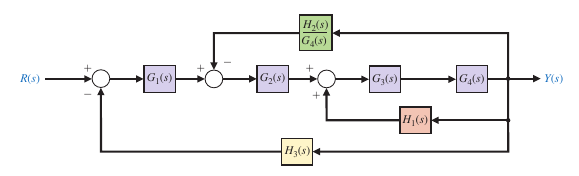

### Step 3: Eliminate G3, G4, H1 loop

In [3]:
sys2 = ct.series(g3, g4)
sys3 = ct.feedback(sys2, h1, 1)


### Step 4: Eliminate with loop H2

In [4]:
sys4 = ct.feedback(ct.series(g2, sys3), sys1)

### Step 5: Eliminate remainin loop and calculate transfer function of system

<TransferFunction>: sys[13]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

               s^5 + 4 s^4 + 6 s^3 + 6 s^2 + 5 s + 2
  ----------------------------------------------------------------
  12 s^6 + 205 s^5 + 1066 s^4 + 2517 s^3 + 3128 s^2 + 2196 s + 712

Poles: 6 [-10.11738496+0.j          -2.44031596+0.j
  -2.34926341+0.j          -0.5881845 +0.82279096j
  -0.5881845 -0.82279096j  -1.        +0.j        ]
Zeros: 5 [-2.00000000e+00+0.00000000e+00j -2.35922393e-16+1.00000000e+00j
 -2.35922393e-16-1.00000000e+00j -1.00000000e+00+3.12341929e-08j
 -1.00000000e+00-3.12341929e-08j]


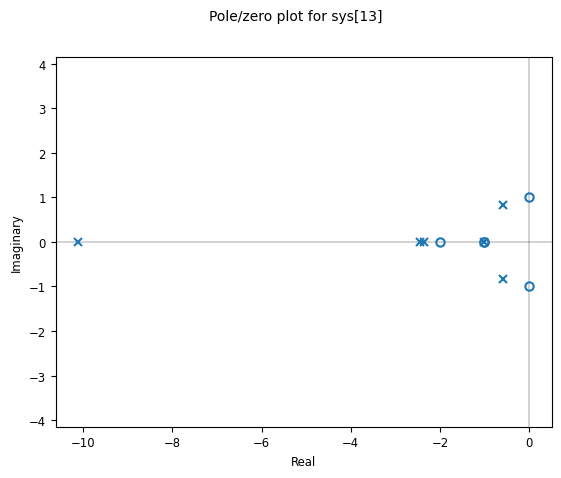

In [5]:
sys = ct.feedback(ct.series(g1, sys4), h3)
print(sys)
print()
sys_poles = sys.poles()
sys_zeros = sys.zeros()
print(f"Poles: {len(sys_poles)}", sys_poles)
print(f"Zeros: {len(sys_zeros)}", sys_zeros)

ct.pzmap(sys)

In [6]:
sys_reduced = ct.minreal(sys)
print(sys_reduced)
print()
sys_reduced_poles = sys_reduced.poles()
sys_reduced_zeros = sys_reduced.zeros()
print(f"Poles changed from {len(sys_poles)} to {len(sys_reduced_poles)}") 
print(f"Zeros changed from {len(sys_zeros)} to {len(sys_reduced_zeros)}")


1 states have been removed from the model
<TransferFunction>: sys[14]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

    0.08333 s^4 + 0.25 s^3 + 0.25 s^2 + 0.25 s + 0.1667
  -------------------------------------------------------
  s^5 + 16.08 s^4 + 72.75 s^3 + 137 s^2 + 123.7 s + 59.33

Poles changed from 6 to 5
Zeros changed from 5 to 4


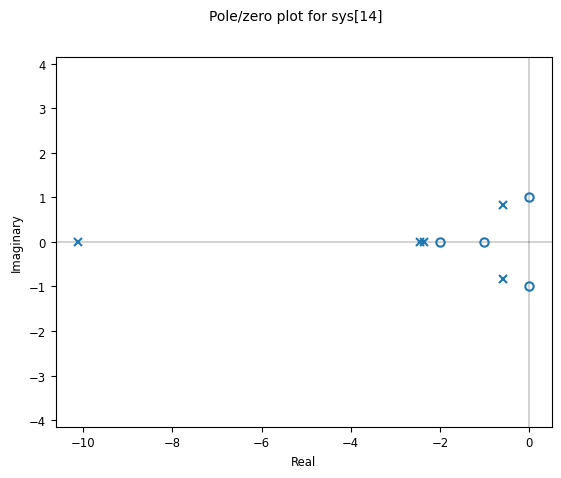

In [7]:
pzmap = ct.pzmap(sys_reduced)

In [8]:
num = [1,4,6,6,5,2]
den = [12, 205, 1066, 2517, 3128, 2196, 712]
sys_test = ct.tf(num, den)
sys_test_reduced = ct.minreal(sys_test)
print(sys_test_reduced)
print("Poles from", len(sys_test.poles()), "to", len(sys_test_reduced.poles()))
print("Zeros from", len(sys_test.zeros()), "to", len(sys_test_reduced.zeros()))

1 states have been removed from the model
<TransferFunction>: sys[16]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

    0.08333 s^4 + 0.25 s^3 + 0.25 s^2 + 0.25 s + 0.1667
  -------------------------------------------------------
  s^5 + 16.08 s^4 + 72.75 s^3 + 137 s^2 + 123.7 s + 59.33
Poles from 6 to 5
Zeros from 5 to 4
